<a href="https://colab.research.google.com/github/crismaque/Se-nales_y_Sistemas_2023_II/blob/main/Fourier/3_EJERCICIOS_Rectificador_RC_THD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulación circuito rectificador de onda completa RC

- Ver [modelado Circuito RC serie y paralelo](https://es.wikipedia.org/wiki/Circuito_RC)

Para circuito RC serie, la salida (voltaje en el capacitor) se puede calcular utilizando impedancias transformadas, como:

$V_c(s) =V_{in}(s) \frac{1}{RCs + 1}$

- Se reemplazará la entrada por una aproximación numérica de una onda cosenoidal rectificada.

- Ver [rectificador onda completa](https://es.wikipedia.org/wiki/Rectificador_de_onda_completa)

Nota: en general se estudia el circuito RC paralelo en rectificadores. El ejercicio planteado en el Taller 2 del curso, cuyo objetivo principal es ilustrar los conceptos de la transformada de Fourier, plantea el estudio del circuito RC serie, por lo que se sugiere trabajar en términos de tensión.

- Para el caso RC paralelo, se asume una fuente de corriente como entrada y la salida en tensión en el capacitor (ver última sección  [modelado Circuito RC serie y paralelo](https://es.wikipedia.org/wiki/Circuito_RC)). Utilizando impedancias transformadas, se tiene que:

$V_c(s) =I_{in}(s) \frac{R}{RCs + 1}$

In [1]:
#paquetes de para simulación
import numpy as np
import scipy
import matplotlib.pyplot as plt
#%matplotlib inline
import scipy.signal as sig
import scipy.optimize as opt
#from IPython.display import Image
import sympy as sym
#sym.init_session()

# Modelo en Laplace circuito RC serie utilizando impedancias transformadas

- Según los modelos descritos anteriormente, se plantea la función de transferencia usando `sympy`.

# Funcion de transferencia

In [2]:
s = sym.symbols('s', complex=True)
t, R, L, C = sym.symbols('t R L C', positive=True)
X = sym.Function('X')(s)

Y = 1/(R*C*s + 1) * X
Y

X(s)/(C*R*s + 1)

# Fijar valores de parámetros para simulación

- Se fijan los valores de resistencia y capacitancia para la simulación:

In [ ]:
R_v = 1000 #valores de simulacion de R
C_v =  10e-6 # valores de simulacion de C
Y_RC = Y.subs(R, R_v).subs(C, C_v)
Y_RC

X(s)/(0.01*s + 1)

#Función de transferencia en scipy

- Se resuelve la función de transferencia y se pasa al paquete scipy para trabajar con la aproximación numérica de la entrada, en este caso la función senoidal rectificada

- Par más información ver [Función de Transferencia scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html)

In [ ]:
num = np.array([1]) #coeficientes del numerador de la funcion de transferencia como numpy array
den = np.array([R_v*C_v,1])#coeficientes del denominador de la funcion de transferencia como numpy array
G_n = sig.TransferFunction(num, den) #funcion de transferencia en
print(num)
print(den)

[1]
[0.01 1.  ]


# Evaluar el sistema ante entrada de interés y obtener salida en arreglo numpy

In [ ]:
Fo = 60 #frec alimentación
Fs = 30*Fo #frecuencia muestreo
To = 1/Fo #periodo fundamental
Ts = 1/Fs #periodo muestreo
t = np.arange(0, 5*To,Ts) # se simulan 5 peridos de alimentación con un muestreo segun Ts
A = 120 #amplitud entrada
#función de entrada aproximada como onda senoidal rectificada completa
in_o = A*(np.sin(2*np.pi*Fo*t))
rec_c = sig.square(2*np.pi*Fo*t)#función tren de pulsos para simular señal rectificada
#Para rectificador de media onda:
rec_m = 0.5*(sig.square(2*np.pi*Fo*t)+1)
in_ = in_o * rec_c #si se quiere probar con rec media onda multiplicar por rec_m
out = G_n.output(in_, T=t)[1] #evaluar salida ante entrada rectificada mediante aproximacion numérica de scipy

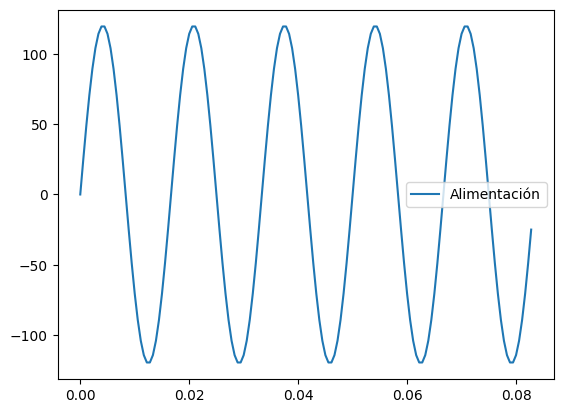

In [ ]:
#señales de alimentación y tren de pulsos
plt.plot(t,in_o,label='Alimentación')
plt.legend()
plt.show()

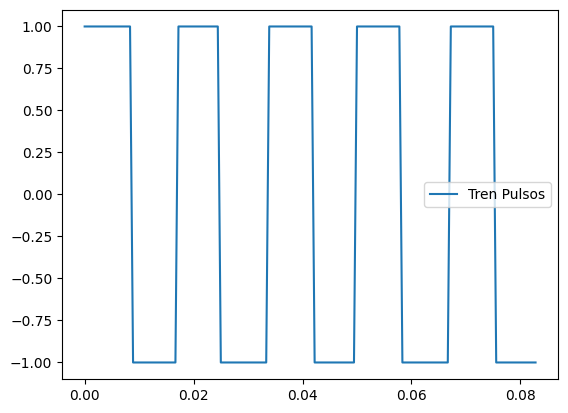

In [ ]:
plt.plot(t,rec_c,label='Tren Pulsos')
plt.legend()
plt.show()

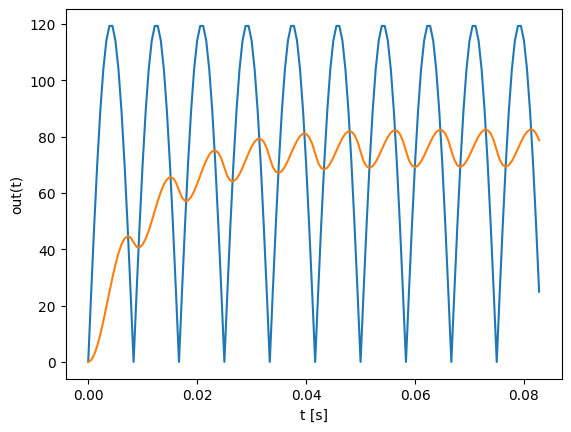

In [ ]:
plt.plot(t, in_,label='In(t)')#entrada rectificada
plt.plot(t, out,label='Out(t)')#salida del circuito
plt.xlabel('t [s]')
plt.ylabel('out(t)')
plt.show()

#Cálculo del espectro con fft

Nota: Debe tener presente el valor de $F_s$ y $F_o$ para el análisis de los armónicos

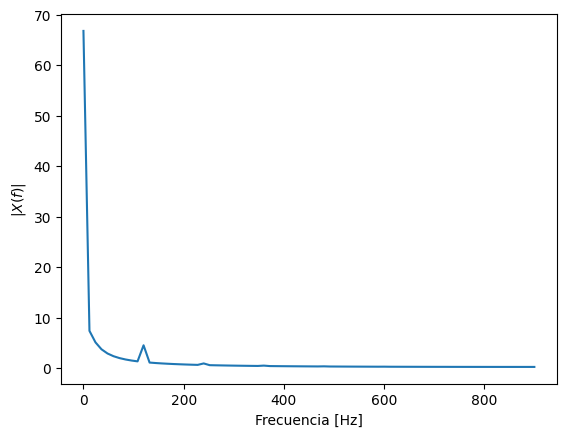

In [ ]:
vfre = np.fft.rfftfreq(len(out),1/Fs) #vector de frecuencia en Hz segun tamaño del vector y tiempo de muestreo
Xf = np.fft.rfft(out)

plt.plot(vfre,abs(Xf/len(out)))
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('$|X(f)|$')
plt.show()

# Cálculo de la distorsión total de armónicos - THD

- Con los valores de frecuencia en Hz y el espectro cálculado como arreglo de numpy, se puede calcular la [distorsión total de armónicos (THD)](https://en.wikipedia.org/wiki/Total_harmonic_distortion), según:

$$THD = \frac{\sqrt{V_2+V_3+\cdots V_n}}{V_1}$$

donde $V_n$ es el valor del $n$-th armónico de la señal de salida del circuito (en términos de tensión) y $V_1$ es la componente (armónico fundamental).

- Además, la medida de [distorsión del factor de potencia](https://eepower.com/technical-articles/total-harmonic-distortion-thd-and-power-factor-calculation/#) se puede calcular desde el THD, como:

$$PF_{THD}=\sqrt{\frac{1}{1+(THD)^2}}$$


**Ejercicios teorico-prácticos: serie y transformada de Fourier**\
\
2.4. Aplicacion en circuitos eléctricos - potencia. Consulte en
que consiste la distorsión total de armónicos (Total Harmonic Distortion-(THD)) y el factor de potencia en un circuito electrico. Cómo puede calcularse el THD desde la FFT?.
Como puede calcularse la distorsión del factor de potencia
con base al THD?. Genere un ejemplo ilustrativo para el
calculo del THD y la distorsión del factor de potencia para un rectificador de onda completa con carga: i) netamente
resistiva y ii) carga RC en serie. Establezca las condiciones
necesarias para las simulaciones y pruebe con diferentes valores de R y C. Discuta los resultados obtenidos.

* ¿Cómo puede calcularse el THD desde la FFT?

1. Adquirir la señal: Definir la señal a analizar y muestrearla correctamente.
2. Aplicar una FFT: Usando $np.fft.rfftfreq$ se genera el vector de frecuencia en Hz segun el tamaño del vector y el tiempo de muestreo.
3. Identificar las componentes armónicas: Se busca los picos en el espectro de frecuencia despues de la FFT. Cada pico corresponde a una componente en frecuencia de la señal.
4. Calcular la suma de la potencia de las componentes armónicas: Elevar al cuadrado la magnitud de cada componente armónica y sumar estos valores.
5. Calcular la potencia total de la señal: Se eleva al cuadrado la magnitud de cada bin de la FFT y suma todos los valores.
6. Calcular el THD:
$$THD(\%) = \frac{\sqrt{Potencia de armónicas^2}}{PotenciaTotal}\cdot 100$$



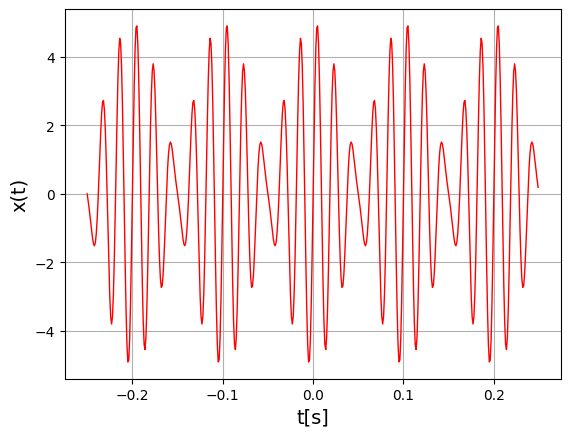

In [9]:
import numpy as np

Fs = 1000
T = 1/2
A1 = 2
A2 = 3
f1 = 60
f2 = 50
tv = np.arange(-T/2,T/2,1/Fs)
x = A1*np.sin(2*np.pi*f1*tv)+A2*np.sin(2*np.pi*f2*tv)

plt.plot(tv,x,'r',linewidth=1)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()


In [8]:
#cálculo de la FFT de la señal signo invertido
vf = np.fft.fftfreq(len(x),1/Fs) #calculo vector de frecuencias
Xw = np.fft.fft(x) #cálculo FFT

70.71067811865474


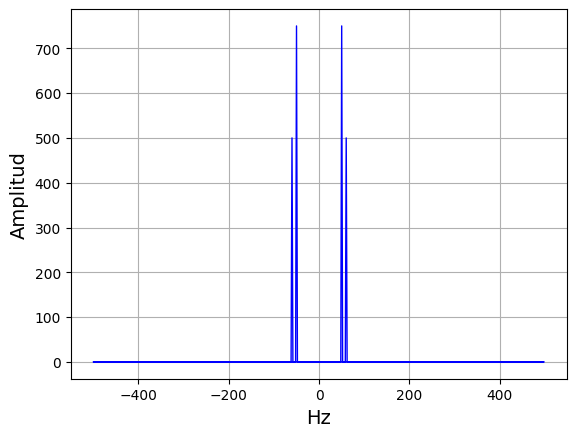

In [14]:
# Encontrar los índices correspondienetes a los armónicos de la señal
indice_f1 = np.where(vf==f1)[0]
indice_f2 = np.where(vf==f2)[0]

# Calcular la suma de las potencias de las armónicas
potencia_f1 = np.abs(Xw[indice_f1])**2
potencia_f2 = np.abs(Xw[indice_f2])**2
potencia_armonicas = potencia_f1+potencia_f2

# Se calcula la potencia total de la señla
potencia_total = np.sum(np.abs(Xw)**2)
THD = np.sqrt(np.sum(potencia_armonicas)) / np.sqrt(potencia_total) * 100
print(THD)

plt.plot(vf,np.abs(Xw),'b',linewidth=1)
plt.grid()
plt.xlabel("Hz",fontsize = 14)
plt.ylabel("Amplitud",fontsize = 14)
plt.show()